In [9]:
import pandas as pd

# read_csv 함수로 csv 파일을 가져와서 df로 변환
df = pd.read_csv('./stock-data.csv')


In [10]:
# 데이터 내용 및 자료형 확인
print(df.head())
print(type(df))

         Date  Close  Start   High    Low  Volume
0  2018-07-02  10100  10850  10900  10000  137977
1  2018-06-29  10700  10550  10900   9990  170253
2  2018-06-28  10400  10900  10950  10150  155769
3  2018-06-27  10900  10800  11050  10500  133548
4  2018-06-26  10800  10900  11000  10700   63039
<class 'pandas.core.frame.DataFrame'>


In [11]:
df['New_Date'] = pd.to_datetime(df['Date']) # 데이터 형변환을 위해 컬럼 추가 
df.info()
# 새로운 컬럼 New_Date를 index로 설정
df.set_index('New_Date', inplace=True)
df.head()

# 1. 데이터 확인 df.info(), df.head()
# 2. 날짜형으로 형변환 (컬럼을 추가)
# 3. 시계열 데이터를 인덱스로 지정 
# 4. 기존의 자료 삭제

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
Date        20 non-null object
Close       20 non-null int64
Start       20 non-null int64
High        20 non-null int64
Low         20 non-null int64
Volume      20 non-null int64
New_Date    20 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB


,Date,Close,Start,High,Low,Volume
New_Date,,,,,,
2018-07-02,2018-07-02,10100,10850,10900,10000,137977
2018-06-29,2018-06-29,10700,10550,10900,9990,170253
2018-06-28,2018-06-28,10400,10900,10950,10150,155769
2018-06-27,2018-06-27,10900,10800,11050,10500,133548
2018-06-26,2018-06-26,10800,10900,11000,10700,63039


In [12]:
# 기존의 컬럼 Date를 삭제 
df.drop('Date', axis=1, inplace=True)
df.head()

,Close,Start,High,Low,Volume
New_Date,,,,,
2018-07-02,10100,10850,10900,10000,137977
2018-06-29,10700,10550,10900,9990,170253
2018-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2018-06-26,10800,10900,11000,10700,63039


In [ ]:
# 판다스 to_datetime() 함수를 사용하면 문자열 등 다른 자료형을 
# 판다스 timestamp를 나타내는 datetime64 자료형으로 변환 가능


In [16]:
df.reset_index(inplace=True) # index_reset : 인덱스 제거 

In [19]:
# dt 속성을 이용하여 new_date 열의 년원일 정보를 년, 월, 일로 구분 
df['Year'] = df['New_Date'].dt.year
df['Month'] = df['New_Date'].dt.month
df['day'] = df['New_Date'].dt.day
df.head()

,New_Date,Close,Start,High,Low,Volume,Year,Month,day
0,2018-07-02,10100,10850,10900,10000,137977,2018,7,2
1,2018-06-29,10700,10550,10900,9990,170253,2018,6,29
2,2018-06-28,10400,10900,10950,10150,155769,2018,6,28
3,2018-06-27,10900,10800,11050,10500,133548,2018,6,27
4,2018-06-26,10800,10900,11000,10700,63039,2018,6,26


In [20]:
import matplotlib.pyplot as plt

#plt.rcParams['font.family'] = 'MalgunGothic'
#plt.rcParams['']

C:\Users\segaeshin\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


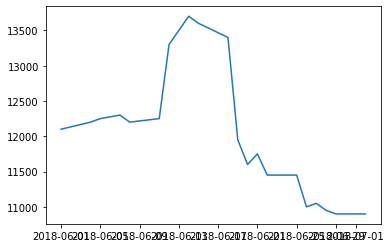

In [22]:
x = df['New_Date']
y= df['High']
plt.plot(x, y)

In [28]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
# titanic 데이터셋에서 age, fare 2개 열을 선택하여 데이터 프레임 만들기 

df = titanic.loc[ : , ['age', 'fare']]


In [30]:
df.head(2)

,age,fare
0,22.0,7.2500
1,38.0,71.2833


In [31]:
# 사용자 함수 정의 : 10을 더하는 ㅏㅎㅁ수
def add_10(a) :
    return a + 10
# 두 객체의 합을 구하는 함수
def add_two_obj(a, b) :
    return a + b

In [32]:
# 시리즈 객체에 10을 더하는 함수를 적용 -> 함수명(값, .....)
# 시리즈.apply(함수명) : 시리즈의 각 원소에 함수를 적용
df['new_age'] = df['age'].apply(add_10) # add_10(값) = > df['age']의 각 원소의 값들이 들어감

In [34]:
df['add_obj'] =df['age'].apply(add_two_obj, b=20)

In [ ]:
df['age'].apply(lambda x : x + 10)

In [37]:
# 시리즈.apply(함수명) : 시리즈 각 원소에 함수를 적용
# 데이터프레임.applymap(함수명) : 데이터프레임에 함수 적용

df_map = df.applymap(add_10)
df_map.head(2)

# 데이터프렘의 각 열에 대해서 함수 매핑
result = df.apply(add_10, axis=0) # 데이터프레임에 apply(함수명, axis=0)

In [39]:
# 최대값 - 최소값
df.apply(lambda x : x.max() - x.min())
result_row = df.apply(add_10, axis=1)
print(result_row.head(2))
print(df.head(2))

    age     fare  new_age  add_obj
0  32.0  17.2500     42.0     52.0
1  48.0  81.2833     58.0     68.0
    age     fare  new_age  add_obj
0  22.0   7.2500     32.0     42.0
1  38.0  71.2833     48.0     58.0


In [38]:
result.head(2)

,age,fare,new_age,add_obj
0,32.0,17.2500,42.0,52.0
1,48.0,81.2833,58.0,68.0


In [41]:
def min_max() : 
    return x.max() - x.min()

In [44]:
df.apply(min_max, axis=0)
df['add'] = df.apply(lambda x : x['age'] + x['fare'],axis=1)

TypeError: ('min_max() takes 0 positional arguments but 1 was given', 'occurred at index age')

In [45]:
# pipe 함수 알아보기
df = titanic.loc[ : , ['age', 'fare']]

# 각 열의 nan 찾기 - 데이터프레임ㅇ 전달하면 데이터프레임을 반환
def missing_value(x) :
    return x.isnull()

# 각 열의 nan 개수 반환 - 데이터프레임 전달하면 시리즈 반환
def missing_count(x) :
    return missing_value(x).sum()

# 데이터프레임의 총 nan개수 - 데이터프레임 전달하면 값을 반환
def total_number_missing(x) :
    return missing_count(x).sum()

In [46]:
result_df = df.pipe(missing_count)
result_df

age     177
fare      0
dtype: int64

In [47]:
result_value = df.pipe(total_number_missing)
result_value

177

In [48]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [50]:
df = titanic.loc[0:4, 'survived':'age']
# 열 이름의 리스트 만들기
columns = list(df.columns.values)
columns

['survived', 'pclass', 'sex', 'age']

In [52]:
# 열 이름을 알파벳 순으로 정렬
new_columns = sorted(columns)
new_columns

# 열 이름을 정렬한 데이터 프레임 생성 
df_sorted = df[new_columns]
df_sorted

# 열 이름을 역으로 정렬하기 
df_reversed = df[list(reversed(columns))]
df_reversed

,age,sex,pclass,survived
0,22.0,male,3,0
1,38.0,female,1,1
2,26.0,female,3,1
3,35.0,female,1,1
4,35.0,male,3,0


In [53]:
df = pd.read_excel('./주가데이터.xlsx')

In [58]:
# 1. 연월일을 문자열로 변경
df['연월일'] = df['연월일'].astype('str')
# 2. 연월일을 '-' 기준으로 split
dates = df['연월일'].str.split('-')
dates
# 3. 데이터프레임에 '연', '월', '일' 컬럼을 추가
# 시리즈에서 각 리스트의 동일 위치의 원소를 추출하고자 할 경우 
#        시리즈.str.get(위치인덱스)
df['연'] = dates.str.get(0) # dates 변수의 원소 리스트의 첫번쟤 인덱스 값 
# df['연'] = dates[0][0]  dates[1][0]
df['월'] = dates.str.get(1)
df['일'] = dates.str.get(2)
df

,연월일,당일종가,전일종가,시가,고가,저가,거래량,연,월,일
0,2018-07-02,10100,600,10850,10900,10000,137977,2018,07,02
1,2018-06-29,10700,300,10550,10900,9990,170253,2018,06,29
2,2018-06-28,10400,500,10900,10950,10150,155769,2018,06,28
3,2018-06-27,10900,100,10800,11050,10500,133548,2018,06,27
4,2018-06-26,10800,350,10900,11000,10700,63039,2018,06,26
5,2018-06-25,11150,150,11400,11450,11000,55519,2018,06,25
6,2018-06-22,11300,100,11250,11450,10750,134805,2018,06,22
7,2018-06-21,11200,350,11350,11750,11200,133002,2018,06,21
8,2018-06-20,11550,250,11200,11600,10900,308596,2018,06,20
9,2018-06-19,11300,700,11850,11950,11300,180656,2018,06,19


In [62]:
s_list = pd.Series([[1,2,3],['abc','def','123'],['10','20','30']])
s_list.str.get(1)

0      2
1    def
2     20
dtype: object

In [68]:
#  나이가 10대(10~19세) 인 승객만 따로 선택 
mask_age = (titanic.age >= 10) & (titanic.age < 20)
mask_age.values
df_teenage = titanic.loc[mask_age, : ]
#df_teenage.describe()
#df_teenage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 9 to 887
Data columns (total 15 columns):
survived       102 non-null int64
pclass         102 non-null int64
sex            102 non-null object
age            102 non-null float64
sibsp          102 non-null int64
parch          102 non-null int64
fare           102 non-null float64
embarked       102 non-null object
class          102 non-null category
who            102 non-null object
adult_male     102 non-null bool
deck           19 non-null category
embark_town    102 non-null object
alive          102 non-null object
alone          102 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 10.4+ KB


In [74]:
# 나이가 10세 미만 60세 이상인 승객의 age,fare,sex,class 칼럼 정보만 출력
mask1 = (titanic.age < 10) | (titanic.age >= 60) 
df_alive = titanic.loc[mask1, ['age', 'fare', 'class', 'alive']]
df_alive

,age,fare,class,alive
7,2.00,21.0750,Third,no
10,4.00,16.7000,Third,yes
16,2.00,29.1250,Third,no
24,8.00,21.0750,Third,no
33,66.00,10.5000,Second,no
...,...,...,...,...
831,0.83,18.7500,Second,yes
850,4.00,31.2750,Third,no
851,74.00,7.7750,Third,no
852,9.00,15.2458,Third,no


In [75]:
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [77]:
# 나이가 10세 미만(0~9세)이고 여성인 승객만 따로 선택 
mask2 = (titanic.age < 10) & (titanic.sex == 'female')
df_female = titanic.loc[mask2 , :]
df_female

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
10,1,3,female,4.00,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
24,0,3,female,8.00,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
43,1,2,female,3.00,1,2,41.5792,C,Second,child,False,NaN,Cherbourg,yes,False
58,1,2,female,5.00,1,2,27.7500,S,Second,child,False,NaN,Southampton,yes,False
119,0,3,female,2.00,4,2,31.2750,S,Third,child,False,NaN,Southampton,no,False
147,0,3,female,9.00,2,2,34.3750,S,Third,child,False,NaN,Southampton,no,False
172,1,3,female,1.00,1,1,11.1333,S,Third,child,False,NaN,Southampton,yes,False
184,1,3,female,4.00,0,2,22.0250,S,Third,child,False,NaN,Southampton,yes,False
205,0,3,female,2.00,0,1,10.4625,S,Third,child,False,G,Southampton,no,False
233,1,3,female,5.00,4,2,31.3875,S,Third,child,False,NaN,Southampton,yes,False


In [80]:
# 함께 탑승한 형제 또는 배우자의 수가 3,4,5 인 승객만 따로 추출 - 불린 인덱싱
# sibs
mask3 = (titanic.sibsp >= 3 )
sibsp_ti = titanic.loc[mask3, : ]
sibsp_ti.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.0,3,1,21.075,S,Third,child,False,NaN,Southampton,no,False
16,0,3,male,2.0,4,1,29.125,Q,Third,child,False,NaN,Queenstown,no,False
24,0,3,female,8.0,3,1,21.075,S,Third,child,False,NaN,Southampton,no,False


In [81]:
#is in 매소드르 활용 하여 간편하게 추출
mask4 = titanic['sibsp']. isin([3,4,5])
df_isin = titanic.loc[mask4,['age', 'fare', 'sex', 'sibsp']]
df_isin.head()

,age,fare,sex,sibsp
7,2.0,21.0750,male,3
16,2.0,29.1250,male,4
24,8.0,21.0750,female,3
27,19.0,263.0000,male,3
50,7.0,39.6875,male,4


In [85]:
# 데이터프레임 합치기 : pandas concat(데이터프레임리스트)
df1 = pd.DataFrame({'a' : ['a0','a1', 'a2', 'a3'],
                   'b' : ['b0', 'b1','b2', 'b3'],
                   'c' : ['c0', 'c1', 'c2', 'c3'])}, index=[0, 1, 2, 3])
df2 = pd.DataFrame({'a' : ['a2', 'a3', 'a4', 'a5'],
                    'b' : ['b2', 'b3', 'b4', 'b5'],
                    'c' : ['c2', 'c3', 'c4', 'c5'],
                    'd' : ['d2', 'd3', 'd4', 'd5'],
                   }, index=[2, 3, 4, 5])

In [89]:
df1 = pd.read_excel('./stock_price.xlsx')
df2 = pd.read_excel('./stock_valuation.xlsx')



In [90]:
# 데이터 프레임 합치기 - 교집합 
merge_inner = pd.merge(df1, df2)
print(merge_inner)

       id stock_name          value   price    name           eps     bps  \
0  130960     CJ E&M   58540.666667   98900  CJ E&M   6301.333333   54068   
1  139480        이마트  239230.833333  254500     이마트  18268.166667  295780   
2  145990        삼양사   82750.000000   82000     삼양사   5741.000000  108090   
3  185750        종근당   40293.666667  100500     종근당   3990.333333   40684   
4  204210     모두투어리츠    3093.333333    3475  모두투어리츠     85.166667    5335   

         per       pbr  
0  15.695091  1.829178  
1  13.931338  0.860437  
2  14.283226  0.758627  
3  25.185866  2.470259  
4  40.802348  0.651359  


In [91]:
# 데이터 프레임 합치기 - 합집합
merge_outer = pd.merge(df1, df2, how='outer', on = 'id')
print(merge_outer)

        id stock_name          value     price       name           eps  \
0   128940       한미약품   59385.666667  421000.0        NaN           NaN   
1   130960     CJ E&M   58540.666667   98900.0     CJ E&M   6301.333333   
2   138250      엔에스쇼핑   14558.666667   13200.0        NaN           NaN   
3   139480        이마트  239230.833333  254500.0        이마트  18268.166667   
4   142280     녹십자엠에스     468.833333   10200.0        NaN           NaN   
5   145990        삼양사   82750.000000   82000.0        삼양사   5741.000000   
6   185750        종근당   40293.666667  100500.0        종근당   3990.333333   
7   192400      쿠쿠홀딩스  179204.666667  177500.0        NaN           NaN   
8   199800         툴젠   -2514.333333  115400.0        NaN           NaN   
9   204210     모두투어리츠    3093.333333    3475.0     모두투어리츠     85.166667   
10  136480        NaN            NaN       NaN         하림    274.166667   
11  138040        NaN            NaN       NaN    메리츠금융지주   2122.333333   
12  161390        NaN    

In [92]:
# 데이터 프레임 합치기 - 왼쪽 데이터프레임 기준, 키 값 분리
merge_left = pd.merge(df1, df2, how='left', left_on='stock_name', right_on='name')
print(merge_left)

     id_x stock_name          value   price      id_y    name           eps  \
0  128940       한미약품   59385.666667  421000       NaN     NaN           NaN   
1  130960     CJ E&M   58540.666667   98900  130960.0  CJ E&M   6301.333333   
2  138250      엔에스쇼핑   14558.666667   13200       NaN     NaN           NaN   
3  139480        이마트  239230.833333  254500  139480.0     이마트  18268.166667   
4  142280     녹십자엠에스     468.833333   10200       NaN     NaN           NaN   
5  145990        삼양사   82750.000000   82000  145990.0     삼양사   5741.000000   
6  185750        종근당   40293.666667  100500  185750.0     종근당   3990.333333   
7  192400      쿠쿠홀딩스  179204.666667  177500       NaN     NaN           NaN   
8  199800         툴젠   -2514.333333  115400       NaN     NaN           NaN   
9  204210     모두투어리츠    3093.333333    3475  204210.0  모두투어리츠     85.166667   

        bps        per       pbr  
0       NaN        NaN       NaN  
1   54068.0  15.695091  1.829178  
2       NaN        NaN   

In [93]:
# 데이터 프레임 합치기 - 오른쪽 데이터 프레임 기준, 키 값 분리
merge_right = pd.merge(df1, df2, how='right', left_on='stock_name', right_on='name')
print(merge_right)

       id_x stock_name          value     price    id_y       name  \
0  130960.0     CJ E&M   58540.666667   98900.0  130960     CJ E&M   
1  139480.0        이마트  239230.833333  254500.0  139480        이마트   
2  145990.0        삼양사   82750.000000   82000.0  145990        삼양사   
3  185750.0        종근당   40293.666667  100500.0  185750        종근당   
4  204210.0     모두투어리츠    3093.333333    3475.0  204210     모두투어리츠   
5       NaN        NaN            NaN       NaN  136480         하림   
6       NaN        NaN            NaN       NaN  138040    메리츠금융지주   
7       NaN        NaN            NaN       NaN  161390      한국타이어   
8       NaN        NaN            NaN       NaN  181710  NHN엔터테인먼트   
9       NaN        NaN            NaN       NaN  207940   삼성바이오로직스   

            eps     bps        per       pbr  
0   6301.333333   54068  15.695091  1.829178  
1  18268.166667  295780  13.931338  0.860437  
2   5741.000000  108090  14.283226  0.758627  
3   3990.333333   40684  25.185866  2.470

In [94]:
# 불린 인덱싱과 결합하여 원하는 데이터 찾기 
price = df1[df1['price'] < 50000]
print(price.head())
print('\n')

value = pd.merge(price, df2)
print(value)

       id stock_name         value  price
2  138250      엔에스쇼핑  14558.666667  13200
4  142280     녹십자엠에스    468.833333  10200
9  204210     모두투어리츠   3093.333333   3475


       id stock_name        value  price    name        eps   bps        per  \
0  204210     모두투어리츠  3093.333333   3475  모두투어리츠  85.166667  5335  40.802348   

        pbr  
0  0.651359  


In [95]:
titanic['class'].unique()

[Third, First, Second]
Categories (3, object): [Third, First, Second]

In [97]:
df = titanic.loc[:,['age', 'sex', 'class', 'fare', 'survived']]
len(df)

891

In [ ]:
# class 열을 기준으로분할
grouped = df.groupby(['class'])


In [ ]:
grouped_two = df.groupby(['class', 'sex'])
# grouped_two 그룹 객체에 연산 메소드 적용
average_two = grouped_two.mean()
average_two

# grouped_two 그룹 객체에서 개별 그룹 선택하기 
grouped_two.get_group(('third','female'))

# 여러 함수를 각 열에 동일하게 적용하여 집계
agg_all = grouped.agg(['min','max'])
agg_all

# 각 열마다 다른 함수를 적용하여 집계
agg_sep = grouped.agg({'fare' : ['min', 'max'], 'age' : 'mean'})
agg_sep

sql 문장 

select 보여주는 리스트
from 테블 또는 뷰 (데이터프레임)
where (조인, 머지 조건)
group by(원하는 컬럼 또는 컬럼의 조합으로 그룹)
having 그룹에 함수 적용을 해서 조건
order by 정렬

grouped = df.goupby(컬럼 또는컬럼리스트)
grouped.함수() (min, maxm mean, std.....)
grouped.get_group(원하는 그룹의 컬럼리스트)
grouped.agg([함수리스트])
grouped.agg({컬럼명:[함수리스트], 컬럼명 : 함수})

# 데이터 개수가 200개 이상인 그룹만을 필터링 하여 데이터프레임으로 반환
goruped.filter(lambda x : len(x) > =200)
#age열의 평균이 30보다 작은 그룹만을 필터링 하여 데이터 프렘으로 반환 
grouped.filter(lambda x : x.age.mean() < 30)

grouped.apply(lambda x : x.age.mean() < 30)

In [99]:
grouped = df.groupby(['class', 'sex'])

gdf = grouped.mean()
print(gdf)
print(type(gdf))


                     age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447
<class 'pandas.core.frame.DataFrame'>


In [101]:
print(gdf.loc['First'])

              age        fare  survived
sex                                    
female  34.611765  106.125798  0.968085
male    41.281386   67.226127  0.368852


In [102]:
print(gdf.loc['First', 'female'])

age          34.611765
fare        106.125798
survived      0.968085
Name: (First, female), dtype: float64


In [103]:
print(gdf.xs('male', level='sex'))

              age       fare  survived
class                                 
First   41.281386  67.226127  0.368852
Second  30.740707  19.741782  0.157407
Third   26.507589  12.661633  0.135447


In [ ]:
grouped = df.groupby(['class','sex']) 

# 그룹 객체에 연산 메서드 적용
gdf = grouped.mean()
gdf

#class 값이 First인 행을 선택
gdf.loc['First']

#class 값이 First이고 sex 값이 male인 행을 선택
gdf.loc[('First','male')]

#sex 값이 male인 행을 선택 : 그룹함수결과.xs(그룹컬럼의 값, level=그룹컬럼명)
gdf.xs('male',level='sex

In [105]:
# 행, 열, 값, 집계에 사용할 열을 1개씩 지정 - 평균 집계
pdf1 = pd.pivot_table(df,                 # 피벗할 데이터 프레임
                     index='class',     # 행 위치에 들어갈 열 
                     columns='sex',      # 열 위치에 들어갈 열
                     values='age',      # 데이터로 사용할 열
                     aggfunc='mean')    # 데이터 집계 함수 
pdf1

pdf2 = pd.pivot_table(df,                    # 피벗할 데이터 프레임
                     index='class',          # 행 위치에 들어갈 열
                     columns='sex',          # 열 위치에 들어갈 열
                     values='age',           # 데이터로 사용할 열
                     aggfunc=['mean','sum','count'])   # 데이터 집계 함수

pdf2
pdf2.xs('First')

       sex   
mean   female      34.611765
       male        41.281386
sum    female    2942.000000
       male      4169.420000
count  female      85.000000
       male       101.000000
Name: First, dtype: float64